<a href="https://colab.research.google.com/github/aghakishiyeva/Explainable-Techniques-II/blob/main/AIPI590_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in? Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/aghakishiyeva/Explainable-Techniques-II/tree/main)

### Install and Import Required Libraries

In [3]:
!pip install pyALE matplotlib seaborn scikit-learn

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

from sklearn.inspection import PartialDependenceDisplay
from PyALE import ale

### Load and Explore the Dataset

In [5]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Exploratory Data Analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


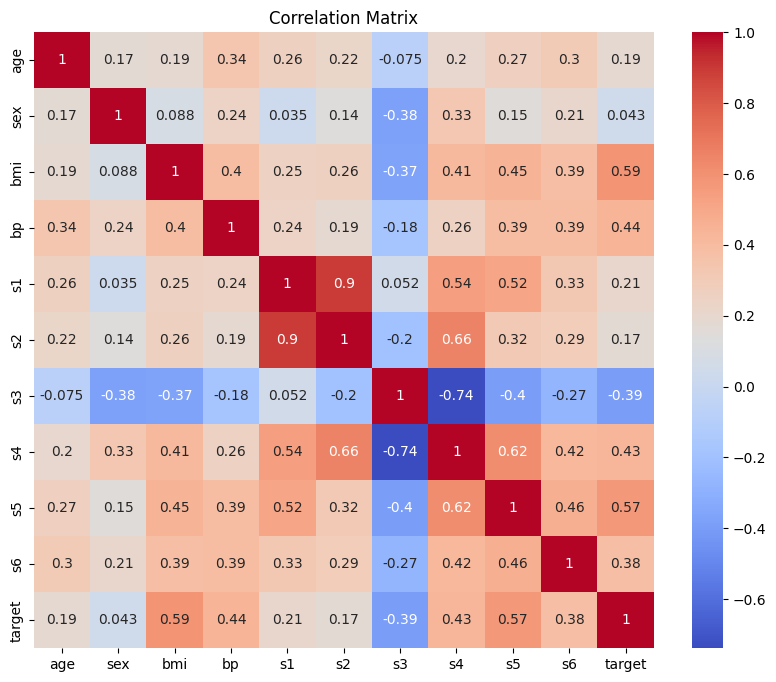

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The heatmap shows that `BMI` has one of the strongest connections to diabetes progression. This means that as BMI goes up, diabetes tends to progress as well, making BMI a key factor in predicting how diabetes will develop. Other factors, like `S5`, `S4` and `bp`, also have a noticeable relationship with diabetes progression, indicating that they play important roles too.

### Train a Simple Model (Random Forest)

In [9]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5
print(f"RMSE on the test set: {rmse}")

RMSE on the test set: 53.837130987019755


### Partial Dependence Plot (PDP)

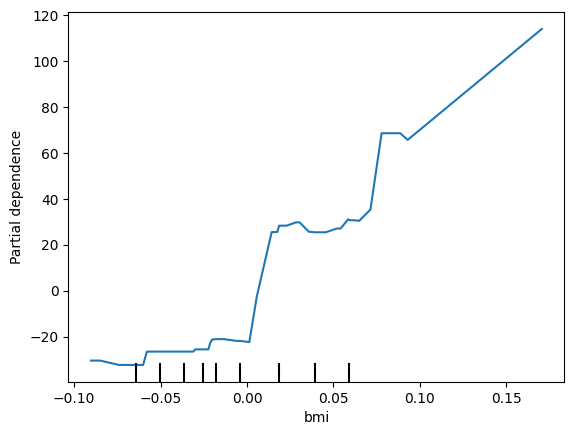

In [14]:
features = ['bmi']
PartialDependenceDisplay.from_estimator(model, X_test, features)
plt.show()

The **Partial Dependence Plot (PDP)** for `bmi` shows a generally positive relationship with diabetes progression but there are sections where the effect on diabetes progression rises sharply, and other areas where it increases more gradually. This suggests that while higher BMI values are generally associated with increased diabetes progression, the relationship is complex and may vary at different BMI levels.

### Individual Conditional Expectation (ICE) Plot

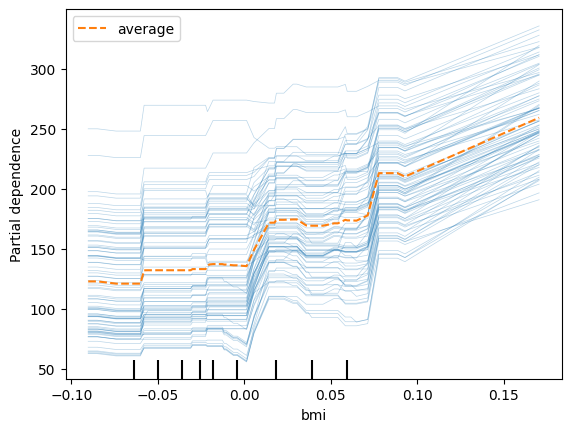

In [15]:
features = ['bmi']
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='both')
plt.show()

The **Individual Conditional Expectation (ICE)** plot for `bmi` indicates that, overall, higher BMI levels are associated with increased diabetes progression. While individual lines show some variation in the degree of change, the general pattern is similar across observations, with most following an upward trend. This suggests that BMI has a fairly consistent effect on diabetes progression across individuals.

### Accumulated Local Effects (ALE) Plot

INFO:PyALE._ALE_generic:Continuous feature detected.


                 eff  size  lowerCI_95%  upperCI_95%
bmi                                                 
-0.090275 -25.966950   0.0          NaN          NaN
-0.069797 -27.852352   6.0   -27.852352   -27.852352
-0.064408 -27.852352   3.0   -27.852352   -27.852352
-0.057941 -18.882281   6.0   -24.285444   -13.479117
-0.050396 -18.882281   3.0   -18.882281   -18.882281
-0.045007 -18.882281   4.0   -18.882281   -18.882281
-0.036385 -18.882281   5.0   -18.882281   -18.882281
-0.033151 -18.882281   5.0   -18.882281   -18.882281
-0.025607 -17.696486   4.0   -19.875249   -15.517723
-0.021295 -14.959737   5.0   -16.764515   -13.154959
-0.018062 -12.350353   6.0   -16.263087    -8.437619
-0.011595 -12.350353   3.0   -12.350353   -12.350353
-0.006206 -12.350353   3.0   -12.350353   -12.350353
 0.014272  23.033698   7.0     6.460620    39.606777
 0.017506  23.033698   2.0    23.033698    23.033698
 0.028284  31.664719   4.0    23.213909    40.115529
 0.039062  25.973276   6.0    22.587804    29.

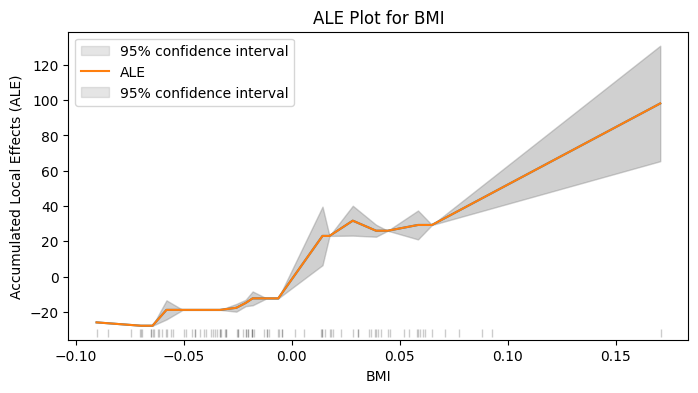

In [16]:

ale_eff = ale(
    X=X_test,
    model=model,
    feature=["bmi"],
    grid_size=20
)

print(ale_eff)

plt.plot(ale_eff.index, ale_eff['eff'], label='ALE')

plt.fill_between(ale_eff.index, ale_eff['lowerCI_95%'], ale_eff['upperCI_95%'], color='gray', alpha=0.2, label='95% confidence interval')

plt.title("ALE Plot for BMI")
plt.xlabel("BMI")
plt.ylabel("Accumulated Local Effects (ALE)")
plt.legend()
plt.show()

The *Accumulated Local Effects (ALE)* plot for `bmi` shows a generally positive effect of BMI on diabetes progression. At lower BMI levels, the effect is minimal or slightly negative, but it becomes strongly positive as BMI increases. The plot also shows confidence intervals, which are narrower at lower BMI levels, indicating higher confidence, and widen at higher BMI, suggesting more variability. Overall, this plot highlights BMI as a key factor in predicting diabetes progression, especially at higher levels.


> ***ChatGPT, developed by OpenAI, was used to generate content in this document.***


